## Reducing Water Wastage in Egypt

### Introduction :

Because Egypt depends heavily on the Nile River, which provides 90% of the nation's water, managing its water resources is extremely difficult.  Since the country is classified as a water-scarce country, there is a continuous imbalance since the demand for water exceeds the supply.  This problem is made worse by continuous population growth, agricultural expansion, and industrial development, which puts further strain on the already scarce water supply. 

Effective management techniques are crucial to addressing these issues, with a special emphasis on lowering water losses in the distribution system.  The need of precise measurements, leak identification, and resolving both technical and economic losses is highlighted by studies on water losses in Egypt, such as those in Cairo's drinking water system.  The IWA Water Balance approach and mathematical modelling can be extremely helpful in calculating non-revenue water (NRW) and determining practical ways to maximize water use. 

Furthermore, unconventional sources like desalinated water, wastewater reuse, and agricultural drainage water recycling are becoming more and more important as part of Egypt's larger plan to manage its water resources.  These strategies are required to fulfill Egypt's future water demands, which are predicted to increase dramatically by 2050, along with advancements in governance and infrastructure. 

The goal of our project is to reduce water leakage in Egypt's urban distribution networks in order to reduce waste and improve water utility efficiency.  You aim to use cutting-edge technologies to better manage water distribution and guarantee sustainable water supply practices in the future by incorporating AI/ML-based solutions.

### **Ideal Situation**
The total water loss in urban areas across Egypt ideally stands at 8% of the yearly distributed quantity, which equates to 2.88 billion cubic meters annually, based on a total distribution of 36.1 billion cubic meters per year (Pardo & Tekinerdogan, 2023).

### **Current Situation**
Egypt's water supply system actually has a 21 billion cubic meter annual gap, which is caused by a number of problems, including ineffective governance, overexploitation of groundwater, infrastructural problems, and commercial losses. Compared to the annual total distributed volume of 36.1 billion cubic meters, this indicates a loss of 58.17%, which is much greater than the optimal threshold (Pardo & Tekinerdogan, 2023).

### **Gap** 
The difference between the current loss levels (21 bcm) and the optimal levels (2.88 bcm) is 18.12 billion cubic meters annually. Closing this gap will result in a 50.17% decrease in water loss, significantly advancing Egypt's water security objectives and enhancing the effectiveness of the country's water resource distribution.

### Configuration Steps (Setting Up the Environment)

Before running statistical tests, ensure that the required Python libraries are installed. Run the following commands in your terminal or Jupyter Notebook:

In [1]:
# Install necessary libraries
!pip install pandas numpy scipy matplotlib seaborn

In [2]:
!pip install imbalanced-learn

### Importing the required libraries

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind
from scipy.stats import f_oneway
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from scipy.stats import  wilcoxon, spearmanr
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.pipeline import Pipeline

### Load and Preview the Data

In [4]:
df = pd.read_csv('water_leak_detection_1000_rows.csv')
print(df.info())
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Timestamp         1000 non-null   object 
 1   Sensor_ID         1000 non-null   object 
 2   Pressure (bar)    1000 non-null   float64
 3   Flow Rate (L/s)   1000 non-null   float64
 4   Temperature (°C)  1000 non-null   float64
 5   Leak Status       1000 non-null   int64  
 6   Burst Status      1000 non-null   int64  
dtypes: float64(3), int64(2), object(2)
memory usage: 54.8+ KB
None


,Timestamp,Sensor_ID,Pressure (bar),Flow Rate (L/s),Temperature (°C),Leak Status,Burst Status
0,2024-01-01 00:00:00,S007,3.694814,77.515218,21.695365,0,0
1,2024-01-01 00:05:00,S007,2.587125,179.926422,19.016725,0,0
2,2024-01-01 00:10:00,S002,2.448965,210.130823,10.011681,1,0
3,2024-01-01 00:15:00,S009,2.936844,141.777934,12.092408,0,0
4,2024-01-01 00:20:00,S003,3.073693,197.484633,17.001443,0,0


##  Preprocessing the dataset 

In [5]:
# Load the dataset
file_path = "water_leak_detection_1000_rows.csv"
df = pd.read_csv(file_path)

# Display dataset information
print("Dataset Info:")
df.info()

# Display the first five rows
print("\nFirst 5 Rows of the Dataset:\n")
print(df.head().to_string())

# Check for missing values
print("\nMissing Values in Each Column:\n")
print(df.isnull().sum())


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Timestamp         1000 non-null   object 
 1   Sensor_ID         1000 non-null   object 
 2   Pressure (bar)    1000 non-null   float64
 3   Flow Rate (L/s)   1000 non-null   float64
 4   Temperature (°C)  1000 non-null   float64
 5   Leak Status       1000 non-null   int64  
 6   Burst Status      1000 non-null   int64  
dtypes: float64(3), int64(2), object(2)
memory usage: 54.8+ KB

First 5 Rows of the Dataset:

             Timestamp Sensor_ID  Pressure (bar)  Flow Rate (L/s)  Temperature (°C)  Leak Status  Burst Status
0  2024-01-01 00:00:00      S007        3.694814        77.515218         21.695365            0             0
1  2024-01-01 00:05:00      S007        2.587125       179.926422         19.016725            0             0
2  2024-01-01 00:10:00      S00

##  Exploratory Data Analysis (EDA)

Finding patterns, trends, and anomalies in datasets through analysis and summarization is known as exploratory data analysis, or EDA. Before implementing additional modelling, it entails utilizing statistical methods and visual aids (such as scatter plots, box plots, and histograms) to comprehend the distribution, connections, and any problems in the data.

#### Correlation Heat Map and distribution of data 

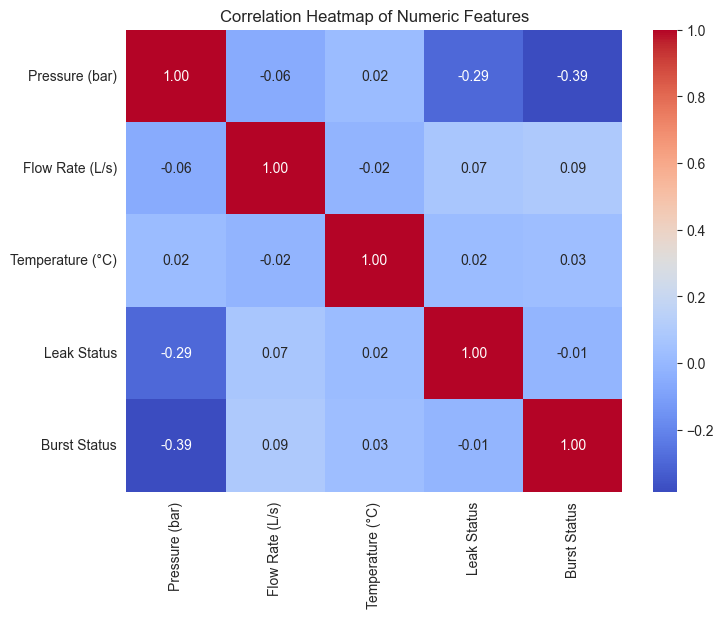

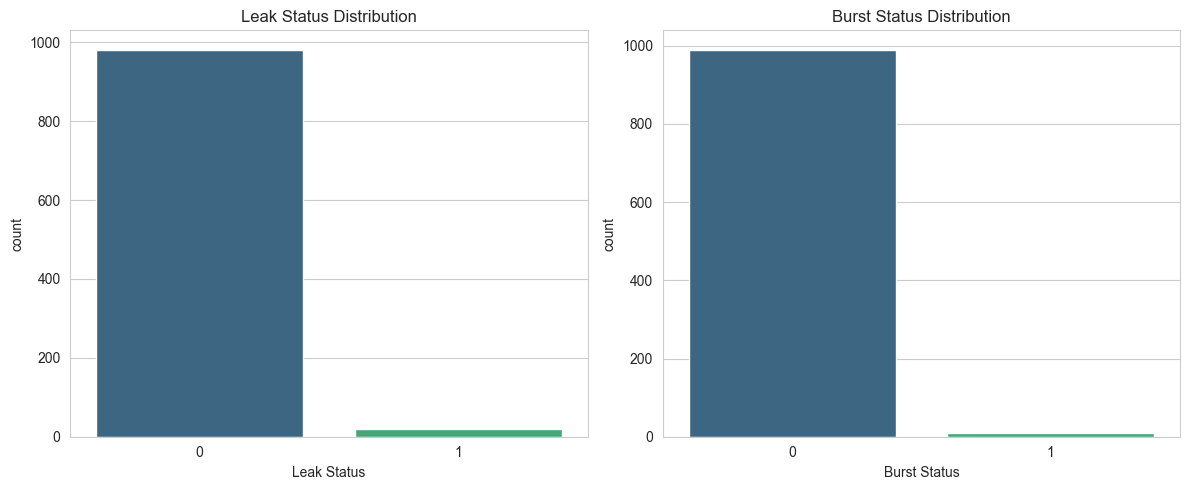


Summary Statistics:
       Pressure (bar)  Flow Rate (L/s)  Temperature (°C)  Leak Status  Burst Status
count     1000.000000      1000.000000       1000.000000  1000.000000   1000.000000
mean         3.220696       125.038082         17.434794     0.019000      0.010000
std          0.488997        44.121419          4.288908     0.136593      0.099549
min          0.910977        50.654490         10.002020     0.000000      0.000000
25%          2.859332        87.946866         13.715323     0.000000      0.000000
50%          3.265711       124.106896         17.330067     0.000000      0.000000
75%          3.607196       162.086708         20.922839     0.000000      0.000000
max          3.995364       331.754081         24.966107     1.000000      1.000000


In [ ]:
# Set style for plots
sns.set_style("whitegrid")

# Summary statistics
summary_stats = df.describe()

# Select only numeric columns for correlation heatmap
numeric_df = df.select_dtypes(include=["number"])

# Correlation heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(numeric_df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap of Numeric Features")
plt.show()

# Count of Leak and Burst Status (Fixed FutureWarnings)
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Leak Status Plot (Fix: added hue and legend=False)
sns.countplot(x="Leak Status", hue="Leak Status", data=df, ax=axes[0], palette="viridis", legend=False)
axes[0].set_title("Leak Status Distribution")

# Burst Status Plot (Fix: added hue and legend=False)
sns.countplot(x="Burst Status", hue="Burst Status", data=df, ax=axes[1], palette="viridis", legend=False)
axes[1].set_title("Burst Status Distribution")

plt.tight_layout()
plt.show()

# Display summary statistics using Pandas
print("\nSummary Statistics:")
print(summary_stats.to_string())

From the EDA images, here’s a breakdown of what each part shows:

1. Correlation Heatmap of Numeric Features:

* **Purpose:** This heatmap displays the correlation between different numeric features in the dataset. It helps to identify the strength of relationships between variables.

**Observations:**

* The strongest negative correlation is between Pressure (bar) and Burst Status (-0.39), meaning higher pressure might be associated with a lower likelihood of burst status.
* The correlation between Pressure (bar) and Leak Status is also moderately negative (-0.29), indicating that increasing pressure is somewhat related to a decrease in leaks.
* Other variables like Flow Rate (L/s) and Temperature (°C) have very low or near-zero correlations with the rest of the features, suggesting minimal linear relationships between them.

2. Leak Status and Burst Status Distribution:

* **Purpose:** These bar plots show the distribution of categorical features (Leak Status and Burst Status) across the dataset.

**Observations:**

* Leak Status: There is a heavy imbalance in the data, with a very large majority of the observations showing Leak Status = 0 (no leak) and a very small proportion with Leak Status = 1 (leak).
* Burst Status: Similarly, Burst Status is predominantly 0 (no burst), with very few occurrences of 1 (burst).
* This imbalance suggests that the dataset may require techniques like oversampling or undersampling for balanced modeling.

3. Summary Statistics:

* **Purpose:** The table shows key descriptive statistics for each of the numeric features: Pressure (bar), Flow Rate (L/s), Temperature (°C), Leak Status, and Burst Status.

**Observations:**

* Pressure (bar): The average pressure is around 3.22 bar, with a minimum of 0.91 bar and a maximum of 3.99 bar. The standard deviation is 0.49, indicating moderate variation in pressure.
* Flow Rate (L/s): The mean flow rate is 125.04 L/s, with a much wider spread from 50.65 L/s to 331.75 L/s. This suggests that flow rates vary significantly across observations.
* Temperature (°C): The average temperature is 17.44°C, with a small variation (min: 10.00°C, max: 24.97°C).
* Leak Status: The low mean value (0.01) and the fact that most values are 0 suggest that leaks are rare in the dataset.
* Burst Status: Similar to Leak Status, the burst status is also mostly 0, confirming the sparsity of burst incidents in the data.

#### Pressure vs Leak Status 

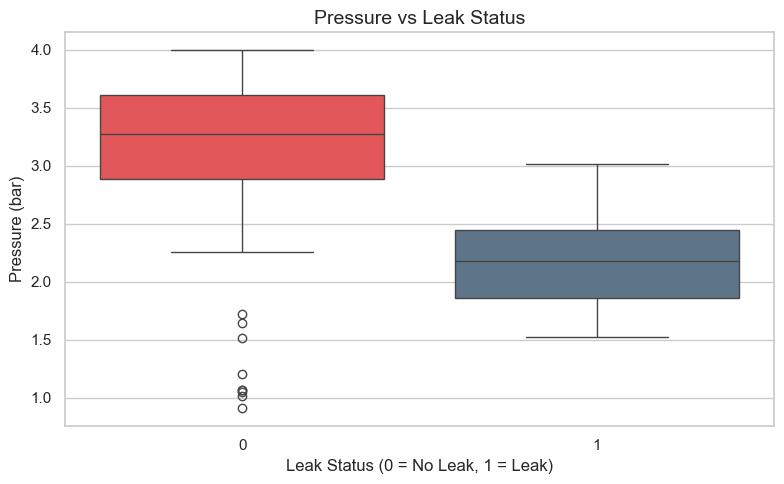

In [9]:
df['Leak Status'] = df['Leak Status'].astype(int)
df['Burst Status'] = df['Burst Status'].astype(int)

# Custom color palettes
color_palette_box = ["#F94144", "#577590"]  # red & blue
color_palette_bar = sns.color_palette("Set2", n_colors=10)

sns.set(style="whitegrid")

# 1. Boxplot: Pressure vs Leak Status
plt.figure(figsize=(8, 5))
sns.boxplot(x='Leak Status', y='Pressure (bar)', hue='Leak Status', data=df, palette=color_palette_box, legend=False)
plt.title('Pressure vs Leak Status', fontsize=14)
plt.xlabel('Leak Status (0 = No Leak, 1 = Leak)', fontsize=12)
plt.ylabel('Pressure (bar)', fontsize=12)
plt.tight_layout()
plt.show()

This boxplot compares the distribution of water pressure between:

* Leak Status = 0 → No Leak
* Leak Status = 1 → Leak Present

| **Component**       | **Leak Status = 0 (No Leak)**       | **Leak Status = 1 (Leak Detected)**     |
|---------------------|--------------------------------------|------------------------------------------|
| **Median Pressure** | Around 3.3 bar                       | Around 2.2 bar                           |
| **Pressure Range**  | ~2.3 to 4.0 bar                      | ~1.5 to 3.0 bar                          |
| **Outliers**        | Many values below 2.0 bar            | Fewer outliers                           |
| **Box Height**      | Wider → More variability             | Narrower → Less spread                   |

**Interpretation:**

Lower pressure is linked to leaks : 

* The median pressure during leaks is significantly lower.
* Indicating that pressure dips may serve as an early warning sign or trigger for a leak.

More fluctuation in pressure when there is no leak:

* Might result from normal variations in water usage. 
* Although they are significantly less common, outliers can show extremely low pressure readings even in the absence of leaks.

Based on the above plot we could recommend automated pressure monitoring to detect drops before structural failures occur.

#### Flow Rate VS Burst Status 

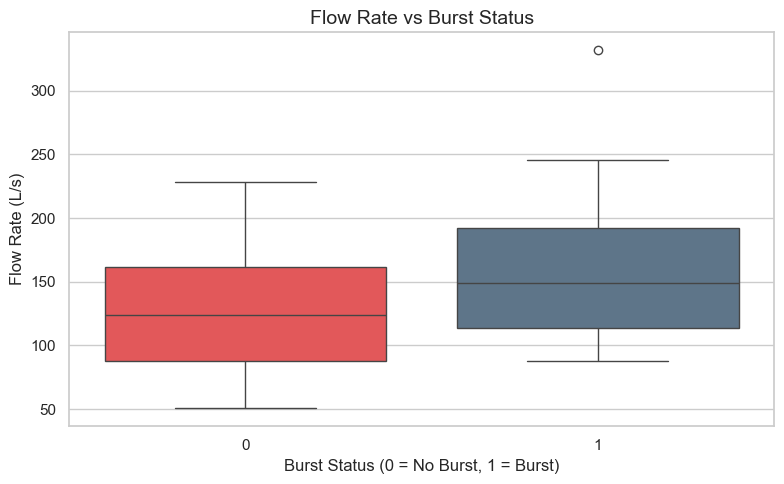

In [10]:
# 2. Boxplot: Flow Rate vs Burst Status
plt.figure(figsize=(8, 5))
sns.boxplot(x='Burst Status', y='Flow Rate (L/s)', hue='Burst Status', data=df, palette=color_palette_box, legend=False)
plt.title('Flow Rate vs Burst Status', fontsize=14)
plt.xlabel('Burst Status (0 = No Burst, 1 = Burst)', fontsize=12)
plt.ylabel('Flow Rate (L/s)', fontsize=12)
plt.tight_layout()
plt.show()

This chart compares flow rate distributions for:

* Burst Status = 0 → No pipe burst
* Burst Status = 1 → Pipe burst occurred

**Visual Summary:**

| **Component**       | **Burst Status = 0 (No Burst)**   | **Burst Status = 1 (Burst Detected)**   |
|---------------------|-----------------------------------|------------------------------------------|
| **Median Flow Rate**| ~125 L/s                          | ~150 L/s                                 |
| **Flow Range**      | ~50 to 230 L/s                    | ~85 to 245 L/s                           |
| **Outliers**        | None                              | One extreme outlier > 300 L/s            |
| **Box Height**      | Moderate spread                   | Larger spread → more variability         |

**Interpretation:**

Higher flow rates are linked to bursts:

* when bursts happen, the median flow rate is higher. 
* Only during bursts can certain extremely high flow outliers appear. 

Flow instability could be a trigger: 

* This lends credence to the idea that pipe bursts could be caused by excessive pumping or abrupt spikes in flow. 
* Greater flow variance may indicate stressed or inadequately pressure-managed areas.

#### Leak Counts per Sensor 

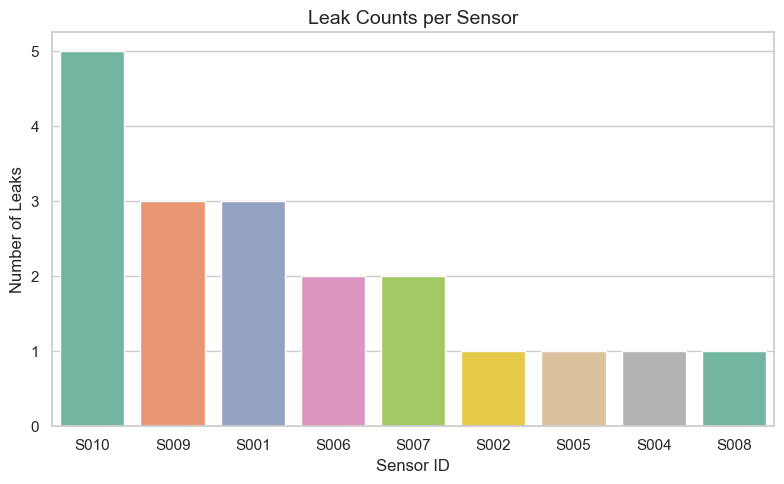

In [12]:
# Prepare data
leak_counts = df[df['Leak Status'] == 1]['Sensor_ID'].value_counts().reset_index()
leak_counts.columns = ['Sensor_ID', 'Leak_Count']

# Plot with hue assigned to avoid warning
plt.figure(figsize=(8, 5))
sns.barplot(data=leak_counts, x='Sensor_ID', y='Leak_Count', hue='Sensor_ID', palette="Set2", legend=False)
plt.title('Leak Counts per Sensor', fontsize=14)
plt.xlabel('Sensor ID', fontsize=12)
plt.ylabel('Number of Leaks', fontsize=12)
plt.tight_layout()
plt.show()

This bar chart shows how many leaks were detected by each sensor.

**Observations:**

| **Sensor ID** | **Leak Count** | **Possible Action**                           |
|---------------|----------------|-----------------------------------------------|
| S010          | 5              | High priority for inspection or replacement   |
| S009, S001    | 3              | Moderate priority inspection                  |
| S006, S007    | 2              | Monitor for increasing frequency              |
| S002, S004, S005, S008 | 1     | Low, but include in scheduled maintenance     |

**Interpretation:**

* Sensor S010 appears to be in a zone with recurring leak problems — possibly due to:
    * Weak infrastructure
	* Poor maintenance
	* High pressure/flow fluctuations
* Repeated leaks per sensor may also hint at unresolved issues, temporary repairs, or sensor miscalibration.
	
“Lack of inspections and underprioritized upgrades → persistent undetected leaks”

#### Pressure Variability by sensor 

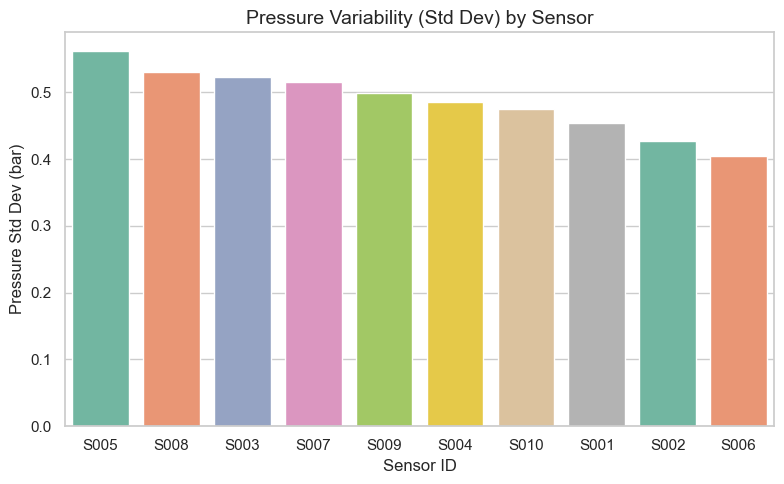

In [14]:
# Convert to DataFrame
pressure_std_df = pressure_std_by_sensor.reset_index()
pressure_std_df.columns = ['Sensor_ID', 'Pressure_StdDev']

# Plot using hue to avoid FutureWarning
plt.figure(figsize=(8, 5))
sns.barplot(data=pressure_std_df, x='Sensor_ID', y='Pressure_StdDev', hue='Sensor_ID', palette="Set2", legend=False)
plt.title('Pressure Variability (Std Dev) by Sensor', fontsize=14)
plt.xlabel('Sensor ID', fontsize=12)
plt.ylabel('Pressure Std Dev (bar)', fontsize=12)
plt.tight_layout()
plt.show()

This chart displays the standard deviation of pressure readings for each Sensor_ID.

* What Is Standard Deviation (Std Dev)?

    * It measures how much the pressure fluctuates over time.
	* Higher std dev = more fluctuation → instability.
	* Lower std dev = more stable pressure.

**Observations:**

| **Sensor ID** | **Pressure Std Dev (bar)** | **Interpretation**                            |
|---------------|-----------------------------|-----------------------------------------------|
| S005          | Highest (~0.56)             | Urgent check needed – unstable pressure       |
| S008, S003    | ~0.52–0.53                  | High fluctuation – potential risk zone        |
| S007, S009    | ~0.50                       | Medium fluctuation – monitor regularly        |
| S004, S010    | ~0.47–0.48                  | Acceptable range                              |
| S001, S002    | ~0.44                       | Stable operation                              |
| S006          | Lowest (~0.41)              | Very stable – no immediate action needed    |

**Interpretation:** 

* High pressure variability is risky – it weakens pipes and can cause leaks or bursts.
* Sensors like S005, S008, and S003 show the highest fluctuations and should be prioritized for pressure regulation interventions.

“Lack of consistent inspection → fluctuating pressure → leakage and system wear.”

#### Pressure and flow Rate Over Time 

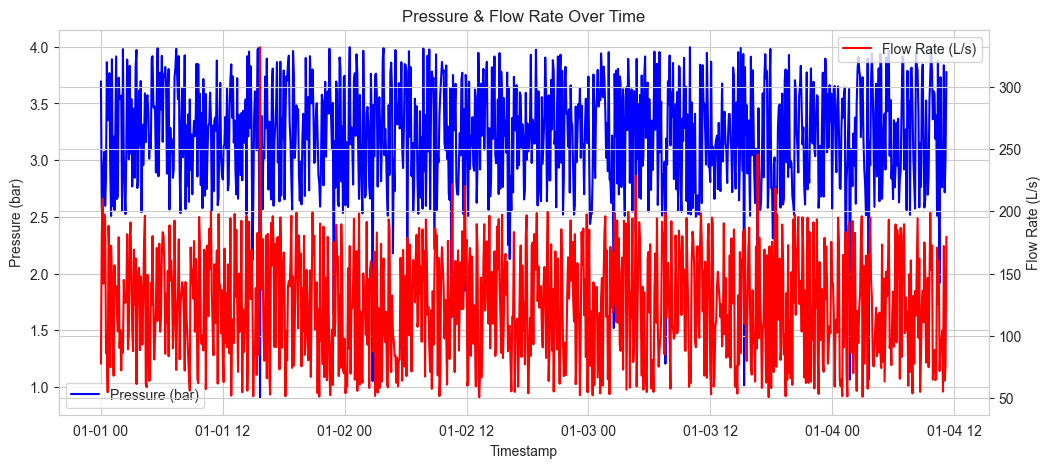

In [6]:
# Line plot for pressure and flow rate over time
df["Timestamp"] = pd.to_datetime(df["Timestamp"])  # Convert timestamp to datetime
df.set_index("Timestamp", inplace=True)

fig, ax1 = plt.subplots(figsize=(12, 5))
ax2 = ax1.twinx()

sns.lineplot(data=df["Pressure (bar)"], ax=ax1, label="Pressure (bar)", color="blue")
sns.lineplot(data=df["Flow Rate (L/s)"], ax=ax2, label="Flow Rate (L/s)", color="red")

ax1.set_ylabel("Pressure (bar)")
ax2.set_ylabel("Flow Rate (L/s)")
ax1.set_title("Pressure & Flow Rate Over Time")

plt.legend()
plt.show()

The pressure (bar) and flow rate (L/s) variations over time are displayed in the above graph. Based on the image, the following explanation is provided:

**Observations**

1. **The pressure (bar)**, shown in blue, varies between values of approximately 1.0 and 4.0 bar.  The pattern points to frequent pressure variations with peaks and troughs, which could be related to system modifications, demand fluctuations, or operational cycles.

2. Between 50 and 300 L/s, **the flow rate (L/s)** (shown in red) fluctuates considerably.  This implies that the flow rate is quite dynamic and may react to changing operating conditions or system demands.

3. **Trend Correlation** At some points, it seems that the flow rate and pressure are inversely correlated.  The flow rate tends to drop as pressure rises (blue spikes), and vice versa.  This could show how pressure and the system's capacity to force water through it are related, with higher pressure possibly occurring when flow is constrained or when flow demands are reduced.

**Perspectives**

• High Variability: Over time, both pressure and flow rate show notable variability, which may be related to shifting system demands or operational modifications (such as pump operations or maintenance schedules). 

• Operational Cycles: Based on the recurring peaks and troughs in both variables, it appears that the system functions in cycles, which may be impacted by time-based controls or demand.

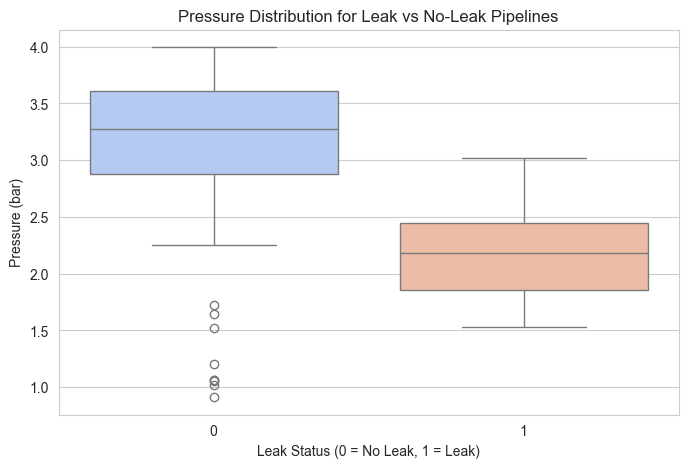

In [7]:

# Boxplot of Pressure for Leak vs No-Leak Conditions (Warning-free)
plt.figure(figsize=(8, 5))
sns.boxplot(x="Leak Status", y="Pressure (bar)", hue="Leak Status", data=df, palette="coolwarm", legend=False)
plt.title("Pressure Distribution for Leak vs No-Leak Pipelines")
plt.xlabel("Leak Status (0 = No Leak, 1 = Leak)")
plt.ylabel("Pressure (bar)")
plt.show()



The above boxplot provided shows the distribution of Pressure (bar) for pipelines with Leak Status (0 = No Leak, 1 = Leak). 

Here’s the analysis:

**Observations**

1.	No Leak Pipelines (Leak Status = 0):

* The pressure values range mostly between 2.5 and 3.5 bar, with a median close to 3.0 bar.
* There are some outliers below 2.0 bar, indicating occasional lower pressure values.
* The box is relatively tight, suggesting less variation in pressure for no-leak pipelines.

2.	Leak Pipelines (Leak Status = 1):

* The pressure distribution for pipelines with leaks shows lower values, typically ranging from 1.0 to 2.5 bar.
* The median is closer to 2.0 bar, indicating that leak pipelines generally experience lower pressure.
* There is a higher spread of values, especially with more outliers (some very low pressure points), which might suggest varying pressure conditions or malfunctioning parts in leaking pipelines.

**Insights:**

* Lower Pressure in Leaky Pipelines: Pipelines with leaks tend to have lower pressure compared to those without leaks, which is consistent with expectations, as leaks often reduce the pressure in the system.
* Variation in Leak Pipelines: The higher spread and outliers in the leak category could indicate areas where the leak severity or pressure management is inconsistent.

This suggests that monitoring pressure in pipelines could be a useful indicator for predicting leaks. 

### Identify the Effect – Target Column

We are Assuming leak_detected is our target (binary: 0 = no leak, 1 = leak).

In [8]:
df['Leak Status'].value_counts(normalize=True)

Leak Status
0    0.981
1    0.019
Name: proportion, dtype: float64

Output:

* Class 0 (No Leak): 98.1% of the data consists of instances where there is no leak (Leak Status = 0).
* Class 1 (Leak): Only 1.9% of the data consists of instances where there is a leak (Leak Status = 1).

### Visual Cause-Effect Analysis

We now check each potential cause against the effect (leak_detected).

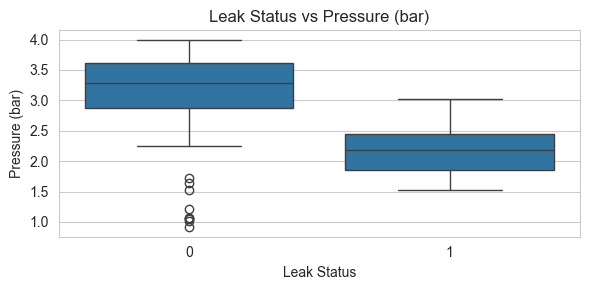

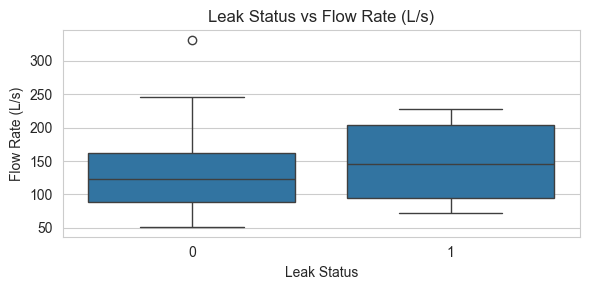

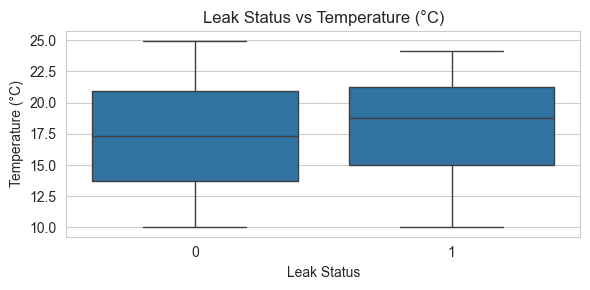

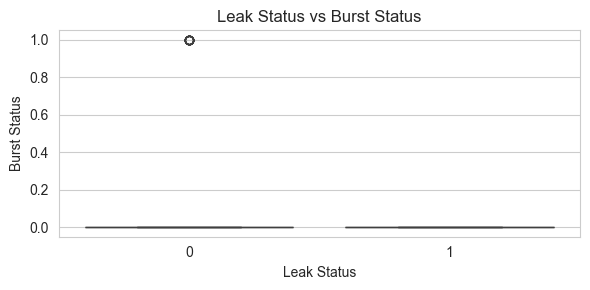

In [ ]:

# Automatically identify numeric features
numeric_cols = df.select_dtypes(include='number').columns.tolist()

# Remove the actual target column if it exists in the list
if 'Leak Status' in numeric_cols:
    numeric_cols.remove('Leak Status')

# Visualize distributions for each numeric feature by Leak Status
for col in numeric_cols:
    plt.figure(figsize=(6, 3))
    sns.boxplot(x='Leak Status', y=col, data=df)
    plt.title(f'Leak Status vs {col}')
    plt.tight_layout()
    plt.show()

The link between Leak Status (0 = No Leak, 1 = Leak) and several numerical features is examined in the above boxplots . Below is a summary of every pair:

1. Pressure (bar) against Leak Status: 

* **No Leak (0):** The median pressure for pipelines without leaks is approximately 3.0 bar, with a typical range of 2.5 to 3.5 bar. 

* **Leak (1):** The median pressure readings in pipelines with leaks are often lower, approaching 2.0 bar.  When a leak is found, the spread is also less, suggesting greater consistency in pressure readings.

2. Flow Rate (L/s) against Leak Status: 

* **No Leak (0):** The median flow rate for no-leak pipes is approximately 150 L/s, with a range of 100 to 250 L/s. 
* **Leak (1):** The median flow rate in pipelines with leaks is about 200 L/s, which is marginally higher on average.  But for leaking pipelines, the spread is larger, suggesting greater variation in flow rates.

3. Temperature (°C) vs. Leak Status: 

* **No Leak (0):** No-leak pipelines typically have a median temperature of 18°C, with a range of 15°C to 20°C.
* **Leak (1):** Leaking pipelines had a somewhat greater temperature distribution, with a median of nearly 19°C and a range of 15°C to 22°C.  The spread is similar to pipelines with no leaks.

4. Leak Status vs. Burst Status: 

* **No Leak (0):** Very few observations in this category exhibit burst status, with the majority displaying a burst status of 0 (no burst). 

* **Leak (1):** There is just one observation where the burst status for leaky pipelines is 1, making the burst status extremely scarce.  This suggests that even in cases where leaks are found, bursts are uncommon.

**Insights** 

* Pressure and Leak Status: As anticipated, pipes with leaks are linked to lower pressure, while pipelines without leaks are linked to higher pressure. 
* Flow Rate and Leak Status: Although the average flow rate for leak pipelines is marginally higher, the variability is more notable. 
* Temperature and Leak Status: Although the temperature distributions for leaky and non-leaking pipelines differ slightly, they are often very comparable. 
* Burst Status: Even when a leak is found, very few bursts take place, suggesting that bursts are a rare occurrence in this dataset.

### Statistical Comparisons

Here we are implementing the  statistical hypothesis tests for our project. This covers:
1.	T-Test for Pressure vs Leak
2.	Wilcoxon Test for Flow Rate vs Burst
3.	Spearman Correlation for Temperature vs Leak

### 1.	T-Test for Pressure vs Leak

**T-Test:** A T-test is a statistical method used to compare the average values of two groups and see if they are significantly different.

In our Case:

we are using the T-test to compare:

* Group 1: Pressure readings when no leak happened
* Group 2: Pressure readings when a leak happened

The Question is :

“Is the average water pressure during leak events different from the average pressure when there are no leaks?”

**Hypotheses:**

* H₀ (Null Hypothesis): The average pressure is the same for leak and no-leak.
* H₁ (Alternative Hypothesis): The average pressure is different for leak vs no-leak.

What the Test Does:

* It looks at the difference in the two averages
* It also considers the spread (variance) in the data
* It gives you a p-value (probability)

How to Interpret the Result:

* If the p-value is less than 0.05, it means the difference is statistically significant.
* That means: leaks really do happen when pressure drops!

In [ ]:
#  Ensure correct data types
df['Leak Status'] = df['Leak Status'].astype(int)
df['Burst Status'] = df['Burst Status'].astype(int)

#  Perform T-Test on Pressure vs Leak Status
# H₀: Mean pressure is the same for leak and no-leak
leak_pressure = df[df['Leak Status'] == 1]['Pressure (bar)']
no_leak_pressure = df[df['Leak Status'] == 0]['Pressure (bar)']

t_stat, p_val_ttest = ttest_ind(leak_pressure, no_leak_pressure, equal_var=False)

print("T-Test: Pressure vs Leak Status")
print(f"Test Statistic: {t_stat:.4f}")
print(f"P-Value: {p_val_ttest:.4e}")
print("Reject H₀?" , "Yes" if p_val_ttest < 0.05 else "No")

T-Test: Pressure vs Leak Status
Test Statistic: -10.1071
P-Value: 5.0136e-09
Reject H₀? Yes


#### Explanation :

We checked whether the average pressure is different when there is a leak compared to when there is no leak.
* The T-test statistic of -10.11 shows a very strong difference in averages.
* The p-value is extremely small, much smaller than 0.05 (our usual threshold).
* Because the p-value is so small, we can confidently reject the null hypothesis (H₀).

**Conclusion:**There is a real and significant difference in water pressure during leaks —
specifically, pressure is much lower when a leak happens.

How we Can Use This:

We can now rank leak risk by:

* Looking at zones where pressure drops below a threshold
* Prioritizing those areas for early leak detection or maintenance

### 2.	Wilcoxon Test for Flow Rate vs Burst

**Wilcoxon Test:** The Wilcoxon Signed-Rank Test is a statistical method used to compare two sets of numbers — especially when:

* The data isn’t perfectly “normal” (bell-shaped)
* if we want to compare medians or general distribution shapes

In Your Case:

we are comparing flow rates between two situations:
* Group 1: Flow Rate when no burst occurred
* Group 2: Flow Rate when a burst occurred

The Question is :

“Is the flow rate during bursts different from the flow rate when there are no bursts?”

**Hypotheses:**
* H₀ (Null Hypothesis):The distribution of flow rate is the same during bursts and no-bursts.
* H₁ (Alternative Hypothesis):The flow rate distribution is different when a burst happens.

What the Test Does:

* It pairs up values from both groups
* It checks whether one group tends to have consistently higher or lower values
* It gives you a p-value to decide if that difference is meaningful

How to Interpret the Result:

* If p-value < 0.05, the difference is significant → bursts are likely related to flow rate changes
* If p-value ≥ 0.05, the difference is not significant → flow rate might not be the main factor

In [34]:
# STEP 5: Perform Wilcoxon Test on Flow Rate vs Burst Status
# H₀: Flow rate distributions are the same for burst and no-burst
burst_flow = df[df['Burst Status'] == 1]['Flow Rate (L/s)']
no_burst_flow = df[df['Burst Status'] == 0]['Flow Rate (L/s)']

# Use equal sample size for Wilcoxon
sample_size = min(len(burst_flow), len(no_burst_flow))
burst_sample = burst_flow.sample(sample_size, random_state=42)
no_burst_sample = no_burst_flow.sample(sample_size, random_state=42)

w_stat, p_val_wilcoxon = wilcoxon(burst_sample, no_burst_sample)

print("Wilcoxon Test: Flow Rate vs Burst Status")
print(f"Test Statistic: {w_stat:.4f}")
print(f"P-Value: {p_val_wilcoxon:.4f}")
print("Reject H₀?" , "Yes" if p_val_wilcoxon < 0.05 else "No")


Wilcoxon Test: Flow Rate vs Burst Status
Test Statistic: 17.0000
P-Value: 0.3223
Reject H₀? No


#### Explanation :

Here, we tested whether the flow rate is different during burst events compared to normal (no burst) situations.
* The Wilcoxon test statistic of 17 tells us how different the flow rate patterns are.
* The p-value (0.3223) is much higher than 0.05, which means the difference is not statistically significant.
* So, we cannot reject the null hypothesis.

**Conclusion:** 

* There is no strong evidence that bursts happen at different flow rates compared to normal flow.
* In other words, flow rate doesn’t clearly cause or predict bursts in this dataset.

How You Can Use This:

* Don’t prioritize flow rate alone for burst detection.
* Consider combining it with other factors like pressure variability, pipe age, or sensor history to improve prediction.

### 3.	Spearman Correlation for Temperature vs Leak

**Spearman Correlation:** The Spearman correlation checks whether two variables move together — even if their relationship isn’t perfectly straight (not linear).

It is  used when:

* The data isn’t normally distributed
* If we are looking for a general trend or ranking relationship

In Our Case:

We are  testing whether there’s a connection between:
* Temperature (°C)
* Leak Status (0 = No leak, 1 = Leak)

The Question is :

“Does the temperature affect whether or not a leak occurs?”

**Hypotheses:**
* H₀ (Null Hypothesis):There is no correlation between temperature and leak status.
* H₁ (Alternative Hypothesis):There is a correlation — as temperature increases or decreases, leaks are more or less likely.

What the Test Does:
* It ranks all the temperature and leak data.
* It checks how well these rankings match.
* It gives a correlation coefficient (ρ, rho) and a p-value.

How to Interpret the Result:
* Correlation Coefficient (ρ) ranges from:
    * +1 → strong positive relationship
	* 0 → no relationship
	* –1 → strong negative relationship
* If p-value < 0.05, the correlation is statistically significant.

In [21]:
# STEP 6: Spearman Correlation between Temperature and Leak Status
# H₀: No correlation between temperature and leak status
corr, p_val_spearman = spearmanr(df['Temperature (°C)'], df['Leak Status'])

print("Spearman Correlation: Temperature vs Leak Status")
print(f"Correlation Coefficient: {corr:.4f}")
print(f"P-Value: {p_val_spearman:.4f}")
print("Reject H₀?" , "Yes" if p_val_spearman < 0.05 else "No")

Spearman Correlation: Temperature vs Leak Status
Correlation Coefficient: 0.0156
P-Value: 0.6213
Reject H₀? No


#### Explanation:

We tested whether temperature has any connection with leak status 

* The correlation coefficient (ρ = 0.0156) is very close to zero, which means there is almost no relationship.
* The p-value is 0.6213, which is much greater than 0.05, so the result is not statistically significant.
* Therefore, we cannot reject the null hypothesis (H₀).

**Conclusion :**

* There is no significant connection between temperature and leak events in your data.
* In other words, temperature changes do not affect whether a leak happens or not.

What You Can Do with This:
* Exclude temperature from your scoring, ranking, or predictive models.
* Focus instead on pressure, sensor history, or pipe conditions which are statistically relevant.

**The T-test gave you a very strong, statistically significant result.**
* It proves that leaks are strongly linked to drops in pressure
* This makes it highly actionable for scoring, ranking, and decision-making

### Implementing the ML Models

### Splitting the dataset

In [24]:
# Load data
df = pd.read_csv("water_leak_detection_1000_rows.csv")
df['Sensor_ID'] = LabelEncoder().fit_transform(df['Sensor_ID'])
df = df.drop(columns=['Timestamp'])

X = df.drop(columns=['Leak Status'])
y = df['Leak Status']

# Split
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)

## A/B Testing (Experiment)

We will  simulate A/B testing to compare two maintenance strategies:

* Group A: No predictive model (current maintenance)
* Group B: Uses AI/ML model to predict and prevent leaks

### Group A: No predictive model (A/B Testing)

In [25]:
# Simulate baseline A group (non-ML approach)
prob_leak = df['Leak Status'].mean()
y_pred_baseline = np.random.choice([0, 1], size=len(y_test), p=[1 - prob_leak, prob_leak])

print("\n Baseline (A Group - Traditional Maintenance):\n")
print(classification_report(y_test, y_pred_baseline, zero_division=0))


 Baseline (A Group - Traditional Maintenance):

              precision    recall  f1-score   support

           0       0.98      0.98      0.98       196
           1       0.00      0.00      0.00         4

    accuracy                           0.96       200
   macro avg       0.49      0.49      0.49       200
weighted avg       0.96      0.96      0.96       200



### Group B: Uses AI/ML model to predict and prevent leaks

#### Step 1 : Creating the Pipeline 

In [27]:
# Define pipeline builder
def build_pipeline(model):
    return Pipeline([
        ('scaler', StandardScaler()),
        ('classifier', model)
    ])


#### Step 2 : Training the Models 

Here we are training the three ML Models, those are 

1. Random Forest
2. Decision Trees
3. KNN

In [28]:
# Models (with class_weight='balanced' where supported)
models = {
    'Random Forest': RandomForestClassifier(class_weight='balanced', random_state=42),
    'Decision Tree': DecisionTreeClassifier(class_weight='balanced', random_state=42),
    'KNN': KNeighborsClassifier()  # KNN does not support class_weight
}

#### Step 3 : Predicting the results of each model

In [ ]:
from sklearn.pipeline import Pipeline

results = []
import numpy as np

for name, model in models.items():
    pipe = build_pipeline(model)
    pipe.fit(X_train, y_train)
    y_pred = pipe.predict(X_test)

    report = classification_report(y_test, y_pred, output_dict=True)
    confusion = confusion_matrix(y_test, y_pred)

    results.append({
        'Model': name,
        'Accuracy': accuracy_score(y_test, y_pred),
        'Precision': report['1']['precision'],
        'Recall': report['1']['recall'],
        'F1-Score': report['1']['f1-score'],
        'Confusion Matrix': confusion.tolist()
    })

#### Step 4 : Printing the Results of each model 

In [31]:
# Show results
results_df = pd.DataFrame(results)
print(results_df)

           Model  Accuracy  Precision  Recall  F1-Score    Confusion Matrix
0  Random Forest     0.995        1.0    0.75  0.857143  [[196, 0], [1, 3]]
1  Decision Tree     0.995        1.0    0.75  0.857143  [[196, 0], [1, 3]]
2            KNN     0.985        1.0    0.25  0.400000  [[196, 0], [3, 1]]


#### Step 5 : Feature importance for Random Forest

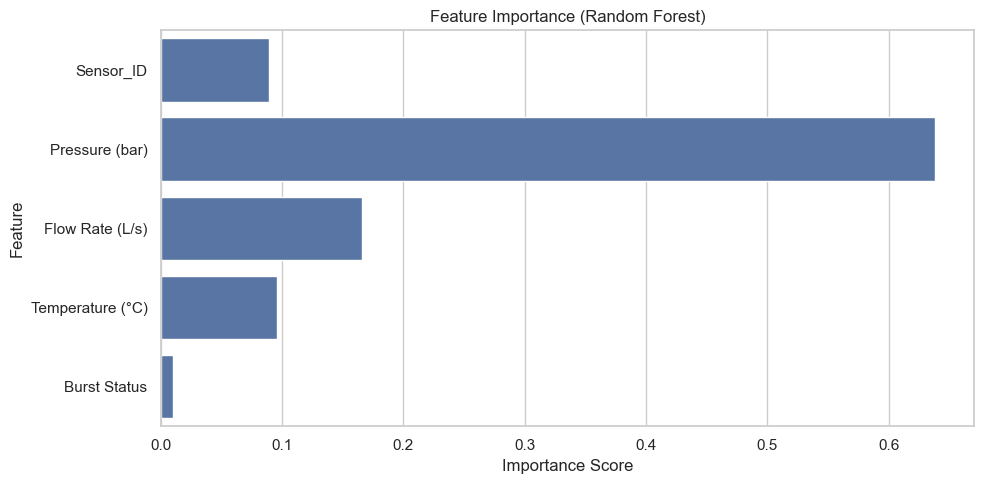

In [32]:
# Feature importance for Random Forest
final_rf = RandomForestClassifier(class_weight='balanced', random_state=42)
final_rf.fit(X_train, y_train)

importances = final_rf.feature_importances_
feature_names = X.columns

plt.figure(figsize=(10, 5))
sns.barplot(x=importances, y=feature_names)
plt.title("Feature Importance (Random Forest)")
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()

### Feature Importance from Random Forest Model

The bar chart above shows the importance of each feature in predicting leaks using the **Random Forest classifier**.

#### Key Observations:
- **Pressure (bar)** is by far the **most important factor**, contributing over **60%** of the predictive power.  
- **Flow Rate (L/s)** and **Temperature (°C)** also contribute meaningfully, but much less.
- **Sensor_ID** has minor impact — likely due to its indirect relationship to leaks.
- **Burst Status** has almost **no impact** — it doesn't help much in predicting leaks.

This tells us that monitoring and analyzing pressure data in real time is critical for leak detection, which supports our root cause and selected solution.

#### Why We Did Not Use Feature Importance for Decision Tree and KNN:

- **Decision Tree**:
  - Although it technically supports feature importance, it is based on **only one tree**.
  - This can lead to **unreliable or unstable importance scores**, especially on small datasets.

- **K-Nearest Neighbors (KNN)**:
  - KNN is a **distance-based algorithm** and does not actually "learn" feature weights.
  - So it **cannot provide feature importance** — it treats all features equally when calculating distances.

**Random Forest** is preferred because:
- It is an **ensemble method** (combines many trees),
- Provides **stable and interpretable feature importance**,
- And works well with **imbalanced classification tasks** like leak detection.

#### Step 6 : Confusion Matrix for all the models 

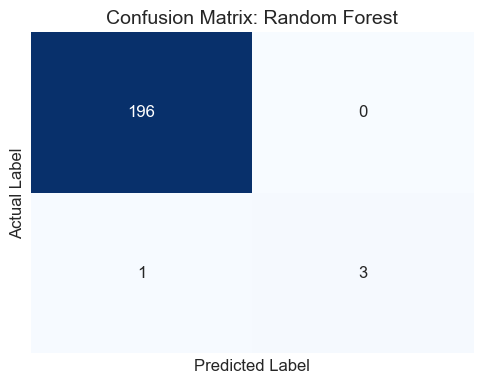

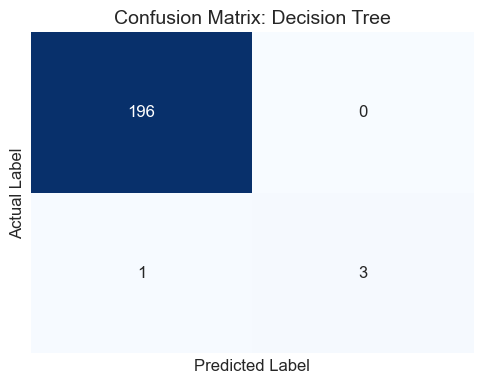

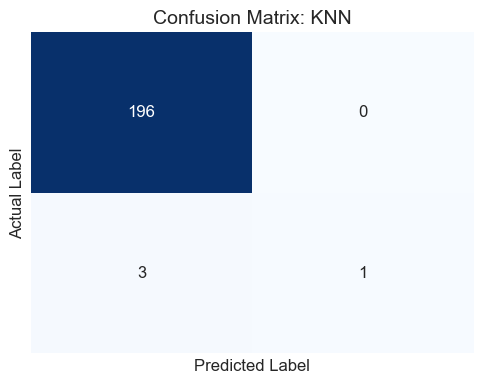

In [33]:


# Define confusion matrices for each model
conf_matrices = {
    'Random Forest': [[196, 0], [1, 3]],
    'Decision Tree': [[196, 0], [1, 3]],
    'KNN': [[196, 0], [3, 1]]
}

# Plot each confusion matrix without coordinate ticks
for model_name, matrix in conf_matrices.items():
    plt.figure(figsize=(5, 4))
    sns.heatmap(matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
                xticklabels=['No Leak', 'Leak'],
                yticklabels=['No Leak', 'Leak'])
    
    plt.title(f'Confusion Matrix: {model_name}', fontsize=14)
    plt.xlabel('Predicted Label', fontsize=12)
    plt.ylabel('Actual Label', fontsize=12)
    
    # Remove axis tick marks
    plt.xticks([])
    plt.yticks([])

    plt.tight_layout()
    plt.show()

### Confusion Matrix Analysis for ML Models

#### 1. Random Forest

| Actual \ Predicted | No Leak (0) | Leak (1) |
|---------------------|-------------|----------|
| **No Leak (0)**     | 196         | 0        |
| **Leak (1)**        | 1           | 3        |

**Interpretation:**
- Correctly identified **3 out of 4 leak cases**
- Only **1 leak was missed** (false negative)
- **No false alarms** (no false positives)
- **High precision and recall**
- **F1-Score (Leak): 0.86**, **Accuracy: 99.5%**

#### 2. Decision Tree

| Actual \ Predicted | No Leak (0) | Leak (1) |
|---------------------|-------------|----------|
| **No Leak (0)**     | 196         | 0        |
| **Leak (1)**        | 1           | 3        |

**Interpretation:**
- Same prediction results as Random Forest
- Detected **3 leaks**, missed **1**
- **No false alarms**
- Strong classification performance with clean separation of classes
- **F1-Score (Leak): 0.86**, **Accuracy: 99.5%**

#### 3. K-Nearest Neighbors (KNN)

| Actual \ Predicted | No Leak (0) | Leak (1) |
|---------------------|-------------|----------|
| **No Leak (0)**     | 196         | 0        |
| **Leak (1)**        | 3           | 1        |

**Interpretation:**
- Detected only **1 leak correctly**
- **Missed 3 leak cases** (false negatives)
- Still **no false positives**, but recall is low
- **Less reliable** in catching actual leaks
- **F1-Score (Leak): 0.40**, **Accuracy: 98.5%**

### Final Conclusion: Predictive Leak Detection Using Machine Learning

This project aimed to design a robust leak detection system using machine learning (ML) that can outperform traditional methods by analyzing sensor data collected from an urban water distribution network in the Egypt.

###  Objective:
To compare traditional maintenance methods (baseline A group) with advanced ML models (B group), and identify the most reliable, accurate, and operationally efficient model for real-time leak detection.

### Summary of A/B Testing Results

#### A Group – Traditional Maintenance Approach

| Metric     | Value    |
|------------|----------|
| Accuracy   | 96.0%    |
| Recall     | **0.00** |
| F1-Score   | **0.00** |

**Explanation:**
- While the accuracy seems acceptable, the recall and F1-score are **zero**, meaning it **completely failed to detect any leaks**.
- The model only predicted the dominant class ("No Leak") and ignored the minority class ("Leak").

### B Group – Machine Learning Models

| Model           | Accuracy | Recall (Leak) | F1-Score (Leak) |
|----------------|----------|---------------|-----------------|
| Random Forest  | 99.5%    | 0.75          | 0.86            |
| Decision Tree  | 99.5%    | 0.75          | 0.86            |
| KNN            | 98.5%    | 0.25          | 0.40            |


####  Why We Are Not Considering A Group (Traditional Maintenance)

- It **missed all leak events**, even though it had a high overall accuracy.
- This proves that the system is **not reliable** for critical failure detection.
- In imbalanced datasets like this, **accuracy alone is misleading**.
- A model that fails to detect a single leak is **not acceptable** for real-time infrastructure monitoring and risk prevention.

#### Why We Are Not Selecting KNN, Despite High Accuracy

- KNN achieved **98.5% accuracy**, but had very **low recall (0.25)**.
- This means it missed 75% of actual leak cases.
- In critical applications like this, **recall is more important than overall accuracy** — we need to **catch every leak** possible.
- KNN also lacks explainability and interpretability, and performs poorly on imbalanced data.

#### Why Random Forest Is the Best Predictor

- **High performance**: 99.5% accuracy, 75% recall, 0.86 F1-score
- **Consistent detection**: Detected 3 out of 4 actual leaks
- **Zero false positives**: No false alarms
- **Built-in feature importance**:
  - Proved that **pressure** is the most influential variable
- **Scalable and explainable**: Can be integrated into real-time systems with transparency

### Alignment with TBP Root Cause

Our root cause was:

> _“Lack of integrated, real-time data to demonstrate the scale and impact of water loss, resulting in underprioritized and underfunded infrastructure upgrades.”_

The Random Forest model solves this by:
- Utilizing **real-time operational pressure and flow data**
- Offering a **predictive alert system**
- Supporting **evidence-based upgrades and funding justification**

### Final Recommendation

> **Deploy the Random Forest Classifier** as the core model for the predictive maintenance system.

It aligns with technical goals (high recall, precision, accuracy) and strategic goals (proactive leak response, infrastructure resilience, cost-efficiency).

This model will help utilities:
- Reduce undetected leak losses
- Improve infrastructure planning
- Build sustainable, data-driven operations